<a href="https://colab.research.google.com/github/mayait/ClaseAnalisisDatos/blob/main/machine_learning/Supervised_Learning_Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasification

Classification is used to predict the label, or category, of an observation. For example, we can predict whether a bank transaction is fraudulent or not. As there are two outcomes here - a fraudulent transaction, or non-fraudulent transaction, this is known as binary classification. Regression is used to predict continuous values. 
For example, a model can use features such as number of bedrooms, and the size of a property, to predict the target variable, price of the property.

**Dataset**
https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset
https://www.kaggle.com/datasets/royjafari/customer-churn


**Data Dictionary**

*   Column	Explanation
*   Call Failure	number of call failures
*   Complaints	binary (0: No complaint, 1: complaint)
*   Subscription Length	total months of subscription
*   Charge Amount	ordinal attribute (0: lowest amount, 9: highest amount)
*   Seconds of Use	total seconds of calls
*   Frequency of use	total number of calls
*   Frequency of SMS	total number of text messages
*   Distinct Called Numbers	total number of distinct phone calls
*   Age Group	ordinal attribute (1: younger age, 5: older age)
*   Tariff Plan	binary (1: Pay as you go, 2: contractual)
*   Status	binary (1: active, 2: non-active)
*   Age	age of customer
*   Customer Value	the calculated value of customer
*   Churn	class label (1: churn, 0: non-churn)

In [1]:
import platform, subprocess
platform.processor()

'arm'

In [2]:
!pip install -U mlxtend

In [4]:
!wget https://raw.githubusercontent.com/mayait/ClaseAnalisisDatos/main/machine_learning/datasets/telecom_churn_clean.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

from matplotlib.colors import ListedColormap
import seaborn as sns
%config InlineBackend.figure_format = 'retina' # sharper plots


--2023-01-10 12:18:06--  https://raw.githubusercontent.com/mayait/ClaseAnalisisDatos/main/machine_learning/datasets/telecom_churn_clean.csv
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.111.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 264788 (259K) [text/plain]
Grabando a: «telecom_churn_clean.csv.15»

telecom_churn_clean 100%[===================>] 258.58K  1.31MB/s    en 0.2s    

2023-01-10 12:18:07 (1.31 MB/s) - «telecom_churn_clean.csv.15» guardado [264788/264788]



In [5]:

churn_df = pd.read_csv("telecom_churn_clean.csv")
df = churn_df

In [6]:
df

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


<Figure size 640x480 with 0 Axes>

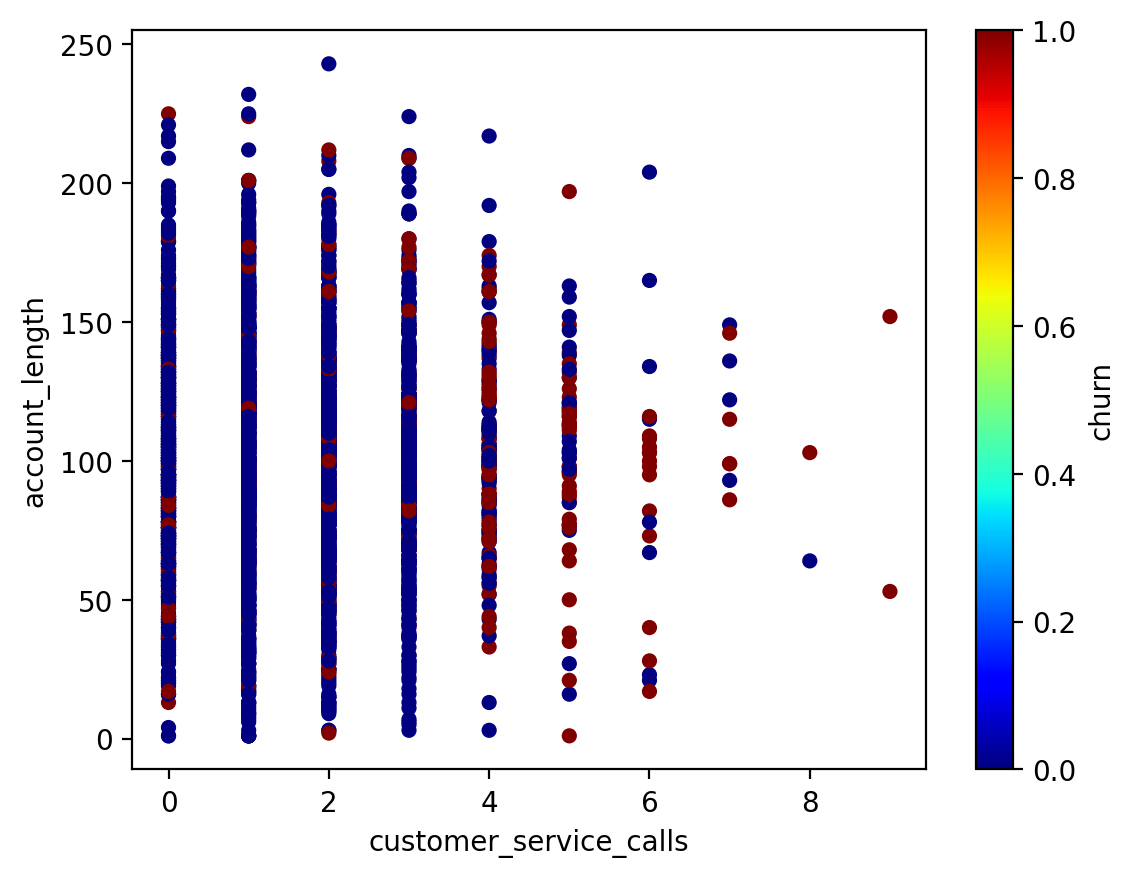

In [7]:
plt.figure()
churn_df.plot.scatter(x='customer_service_calls', y='account_length', c='churn', cmap = plt.get_cmap('jet'))


plt.xlabel("customer_service_calls")
plt.ylabel("account_length")

plt.show()

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

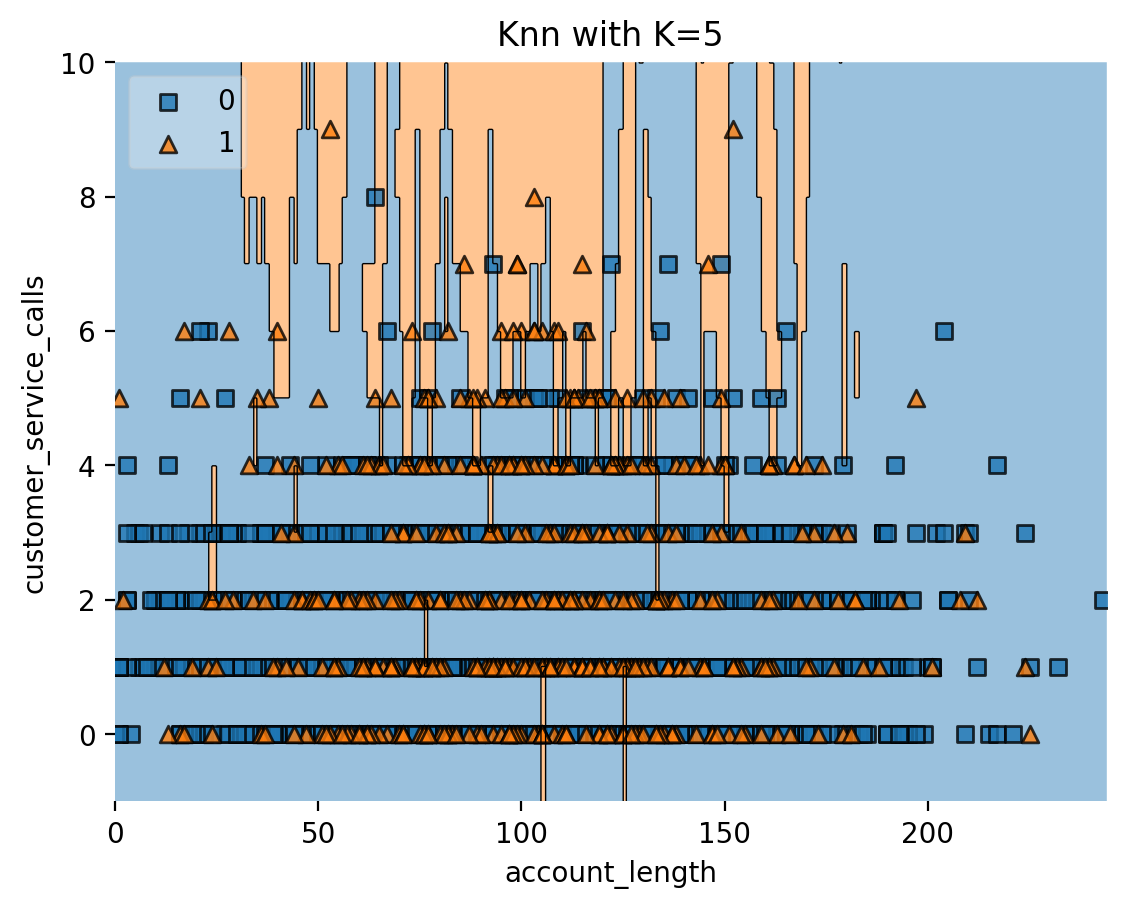

In [9]:
def knn_comparison(data, k):
  y = churn_df["churn"].values
  x = churn_df[["account_length", "customer_service_calls"]].values


  clf = neighbors.KNeighborsClassifier(n_neighbors=k)
  clf.fit(x, y)
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel('account_length')
  plt.ylabel('customer_service_calls')
  plt.title('Knn with K='+ str(k))
  plt.show()

knn_comparison(churn_df, 5)

**k-Nearest Neighbors**
Let's build our first model! We'll use an algorithm called k-Nearest Neighbors, which is popular for classification problems. The idea of k-Nearest Neighbors, or KNN, is to predict the label of any data point by looking at the k, for example, three, closest labeled data points and getting them to vote on what label the unlabeled observation should have. KNN uses majority voting, which makes predictions based on what label the majority of nearest neighbors have.

**k-Nearest Neighbors: Fit**

In this exercise, you will build your first classification model using the churn_df dataset, which has been preloaded for the remainder of the chapter.

The features to use will be "account_length" and "customer_service_calls". The target, "churn", needs to be a single column with the same number of observations as the feature data.

You will convert the features and the target variable into NumPy arrays, create an instance of a KNN classifier, and then fit it to the data.

numpy has also been preloaded for you as np.

**Instructions**
* Import KNeighborsClassifier from sklearn.neighbors.
* Create an array called X containing values from the "account_length" and "customer_service_calls" columns, and an array called y for the values of the "churn" column.
* Instantiate a KNeighborsClassifier called knn with 6 neighbors.
Fit the classifier to the data using the .fit() method.

🌶️ Import KNeighborsClassifier

In [10]:
# Import KNeighborsClassifier
from ____.____ import ____ 

# Create arrays for the features and the target variable
y = ____["____"].values
X = ____[["____", "____"]].values

# Create a KNN classifier with 6 neighbors
knn = ____

# Fit the classifier to the data
knn.____(____, ____)

ModuleNotFoundError: No module named '____'

In [11]:
# SOLUCIÓN
# Import KNeighborsClassifier
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

**k-Nearest Neighbors: Predict**
Now you have fit a KNN classifier, you can use it to predict the label of new data points. All available data was used for training, however, fortunately, there are new observations available. These have been preloaded for you as X_new.

The model knn, which you created and fit the data in the last exercise, has been preloaded for you. You will use your classifier to predict the labels of a set of new data points:

```
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
```

In [12]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

🌶️ Predict the labels for the X_new

In [13]:
# Predict the labels for the X_new
y_pred = ____

# Print the predictions for X_new
print("Predictions: {}".format(____)) 

NameError: name '____' is not defined

In [14]:
# SOLUCION
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


Great work! The model has predicted the first and third customers will not churn in the new array. But how do we know how accurate these predictions are?

# Measuring model performance

Now we can make predictions using a classifier, but how do we know if the model is making correct predictions? We can evaluate its performance!

In classification, accuracy is a commonly-used metric. Accuracy is the number of correct predictions divided by the total number of observations.

How do we measure accuracy? We could compute accuracy on the data used to fit the classifier. However, as this data was used to train the model, performance will not be indicative of how well it can generalize to unseen data, which is what we are interested in!



\begin{align}
        Accuracy = \frac{Correct Predictions}{Total Observations}
    \end{align}

-

\begin{align}
        Precisión = \frac{Predicciones Correctas}{Total Observaciones}
    \end{align}

[Aprende más en Google Machine Learning](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data?hl=en)



It is common to split data into a training set and a test set.

*   We fit the classifier using the training set,
*   then we calculate the model's accuracy against the test set's labels.

![img](https://developers.google.com/static/machine-learning/crash-course/images/PartitionTwoSets.svg)

![img](https://developers.google.com/static/machine-learning/crash-course/images/TrainingDataVsTestData.svg)

Validating the trained model against test data.

Never train on test data. If you are seeing surprisingly good results on your evaluation metrics, it might be a sign that you are accidentally training on the test set. For example, high accuracy might indicate that test data has leaked into the training set.

**Train/test split + computing accuracy**

NumPy arrays have been created for you containing the features as X and the target variable as y. You will split them into training and test sets, fit a KNN classifier to the training data, and then compute its accuracy on the test data using the .score() method.

**Instructions**
* Import train_test_split from sklearn.model_selection.
* Split X and y into training and test sets, setting test_size equal to 20%, random_state to 42, and ensuring the target label proportions reflect that of the original dataset.
* Fit the knn model to the training data.
* Compute and print the model's accuracy for the test data.



In [15]:
# Import the module
____

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = ____(____, ____, test_size=____, random_state=____, stratify=____)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
____

# Print the accuracy
print(knn.score(____, ____))

NameError: name '____' is not defined

In [16]:
## Solución
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


**Overfitting and underfitting**

Interpreting model complexity is a great way to evaluate performance when utilizing supervised learning. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

You will generate accuracy scores for the training and test sets using a KNN classifier with different n_neighbor values, which you will plot in the next exercise.

The training and test sets have been created from the churn_df dataset and preloaded as X_train, X_test, y_train, and y_test.

**Instructions**
* Create neighbors as a numpy array of values from 1 up to and including 12.
* Instantiate a KNN classifier, with the number of neighbors equal to the neighbor iterator.
* Fit the model to the training data.
* Calculate accuracy scores for the training set and test set separately using the .score() method, and assign the results to the index of the train_accuracies and test_accuracies dictionaries, respectively.

In [17]:
# Create neighbors
neighbors = np.arange(____, ____)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = ____(____=____)
  
	# Fit the model
	knn.____(____, ____)
  
	# Compute accuracy
	train_accuracies[____] = knn.____(____, ____)
	test_accuracies[____] = knn.____(____, ____)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

NameError: name '____' is not defined

In [18]:
# Solución
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train,y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


In [19]:
import warnings

warnings.filterwarnings("ignore",category=UserWarning)

for k in np.arange(1, 13):
  knn_comparison(churn_df, k)


AttributeError: 'numpy.ndarray' object has no attribute 'KNeighborsClassifier'

**Visualizing model complexity**

Now you have calculated the accuracy of the KNN model on the training and test sets using various values of n_neighbors, you can create a model complexity curve to visualize how performance changes as the model becomes less complex!

The variables neighbors, train_accuracies, and test_accuracies, which you generated in the previous exercise, have all been preloaded for you. You will plot the results to aid in finding the optimal number of neighbors for your model.

**Instructions:**

* Add a title "KNN: Varying Number of Neighbors".
* Plot the .values() method of train_accuracies on the y-axis against neighbors on the x-axis, with a label of "Training Accuracy".
* Plot the .values() method of test_accuracies on the y-axis against neighbors on the x-axis, with a label of "Testing Accuracy".
* Display the plot.

NameError: name '____' is not defined

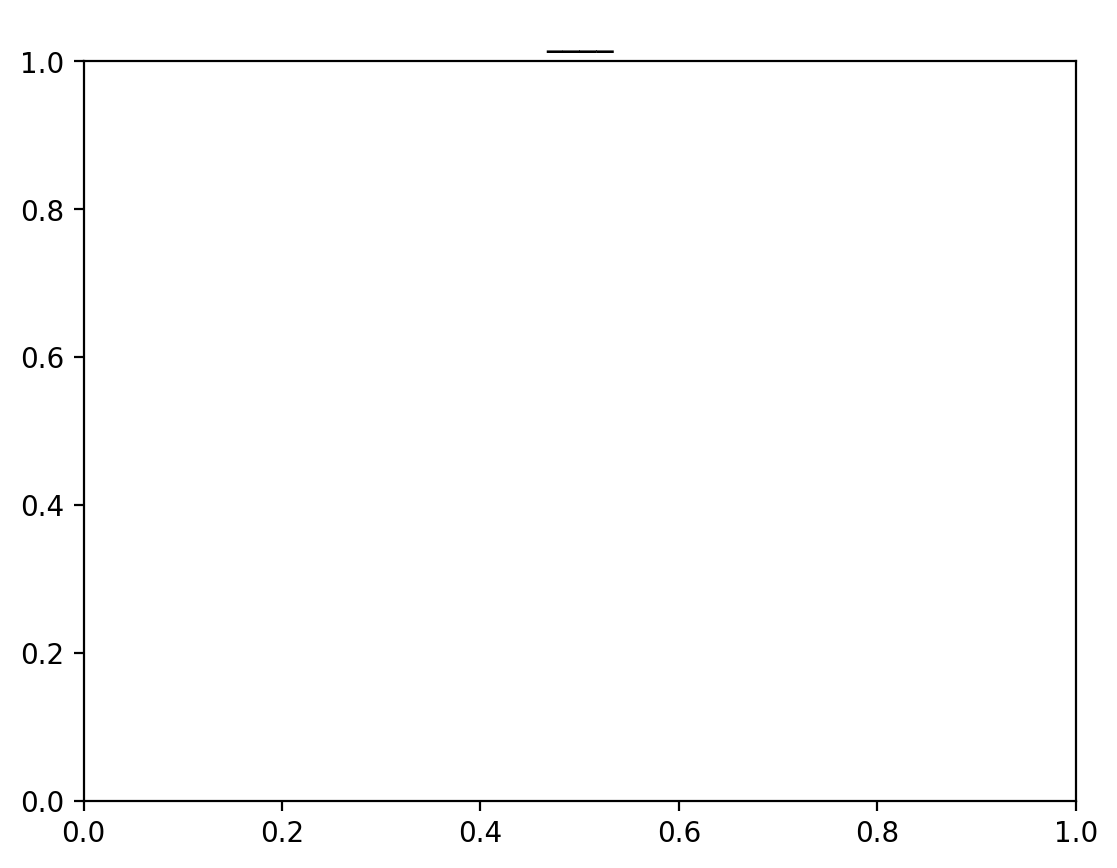

In [20]:
# Add a title
plt.title("____")

# Plot training accuracies
plt.plot(____, ____, label="____")

# Plot test accuracies
plt.plot(____, ____, label="____")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
____

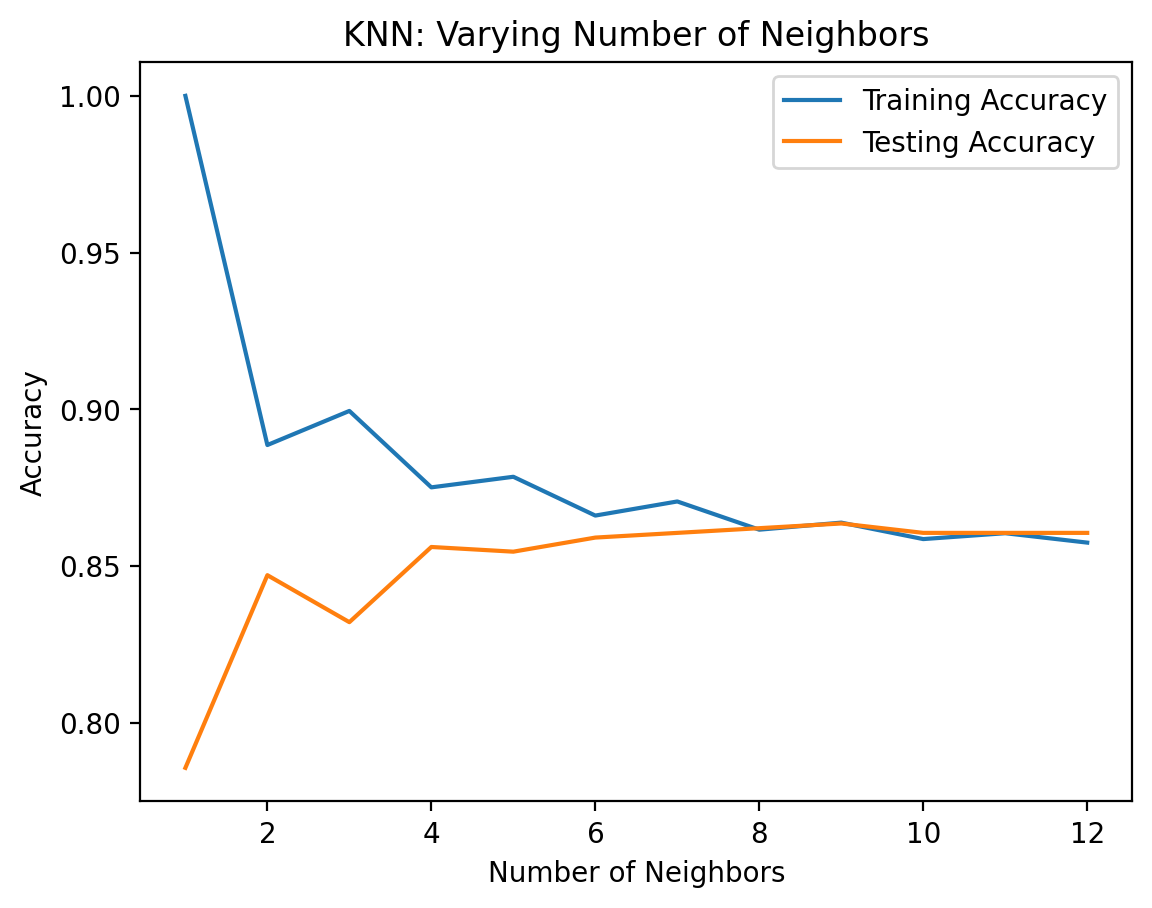

In [21]:
# Solución



# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, list(train_accuracies.values()),  label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, list(test_accuracies.values()),  label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()